# STAT3612 Statistical Machine Learning (2019-20 Semester 1) <a class="tocSkip">

## Assignment 3  <a class="tocSkip">

*ZHANG XINYI UID:3035234571*

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import plot_partial_dependence as pdp

from IPython.display import SVG
from IPython.display import display
from graphviz import Source
import eli5
from eli5.sklearn import PermutationImportance
import shap

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [34]:
#Load the data
cancer = load_breast_cancer()
#Consider only the first 10 attributes (mean features) as the predictor variables
X_train=cancer.data[:,:10]
y_train=cancer.target
feature_names=cancer.feature_names[:10]

## Step 1. Fit a decision tree classifier with max_depth =3. Visualize the fitted tree by export_graphviz. Report the training accuracy.

In [3]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(cancer.data[:,:10], cancer.target)
tree_Pred = tree.predict(cancer.data[:,:10])

print("Training accuracy for a decision tree classifier with max_depth =3 is ", accuracy_score(cancer.target,tree_Pred).round(4))


Training accuracy for a decision tree classifier with max_depth =3 is  0.9578


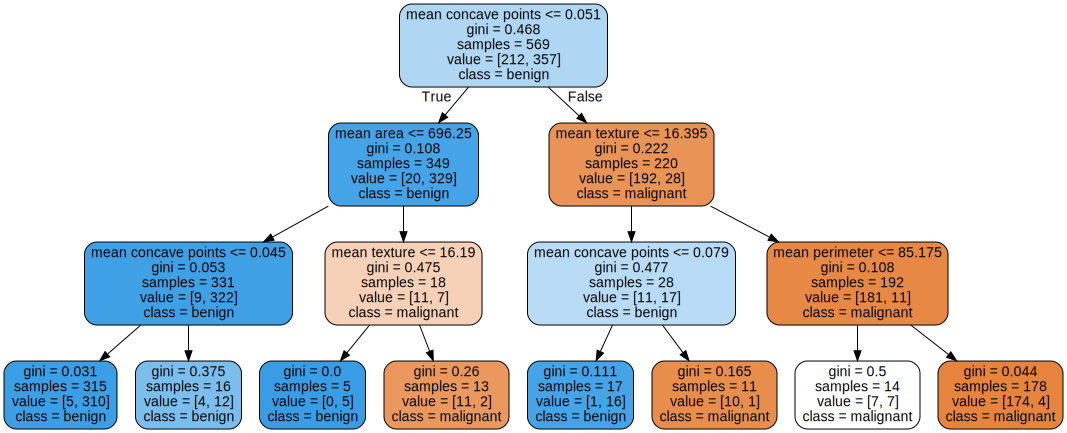

In [4]:
graph = Source(export_graphviz(
        tree,
        feature_names=cancer.feature_names[:10],
        class_names=cancer.target_names,
        rounded=True,
        filled=True
    ))
display(SVG(graph.pipe(format='svg')))

## Step 2. Fit the random forests and gradient boosting machines. Report the training accuracy for both models.

In [22]:
# Fit the random forests classifier
rf_clf = RandomForestClassifier(oob_score=True, random_state=0)
rf_clf.fit(cancer.data[:,:10], cancer.target)
rf_pred= rf_clf.predict(cancer.data[:,:10])
print('Training accuracy for the random forests classifier is:', accuracy_score(cancer.target, rf_pred).round(4))
print('OOB Accuracy:', rf_clf.oob_score_.round(4))

Training accuracy for the random forests classifier is: 0.9965
OOB Accuracy: 0.9033


In [6]:
rf_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [23]:
#Fit the gradient boosting machines
gb_clf = GradientBoostingClassifier()
gb_clf.fit(cancer.data[:,:10], cancer.target)
gb_pred= gb_clf.predict(cancer.data[:,:10])
print('Training accuracy for the gradient boosting machines is:', accuracy_score(cancer.target, gb_pred).round(4))

Training accuracy for the gradient boosting machines is: 1.0


In [8]:
gb_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Step 3. Fit support vector classifiers with linear and RBF kernels. Report the training accuracy for both models.


In [24]:
# fit support vector classifiers with linear kernels
linSVC = LinearSVC(max_iter=1e6)
linSVC.fit(cancer.data[:,:10], cancer.target)
linSVC_pred=linSVC.predict(cancer.data[:,:10])

# show accuracy 
print('Training accuracy for the support vector classifier with linear kernel is:', accuracy_score(cancer.target, linSVC_pred).round(4))

Training accuracy for the support vector classifier with linear kernel is: 0.9139


In [20]:
linSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000000.0,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [25]:
# fit support vector classifiers with RBF kernel
rbfSVC = SVC(gamma='auto')
rbfSVC.fit(cancer.data[:,:10], cancer.target)
rbfSVC_pred=rbfSVC.predict(cancer.data[:,:10])
# show accuracy 
print('Training accuracy for the support vector classifier with RBF kernel is:', accuracy_score(cancer.target, rbfSVC_pred).round(4))



Training accuracy for the support vector classifier with RBF kernel is: 0.9877


In [12]:
rbfSVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Step 4. Fit a muti-layer perceptron (MLP) classifier. Report the training accuracy.

In [26]:
MLP_clf = MLPClassifier(max_iter=10000, random_state=0,)
MLP_clf.fit(cancer.data[:,:10], cancer.target)
MLP_clf_pred=MLP_clf.predict(cancer.data[:,:10])
print('Training accuracy for the multi-layer perceptron classifier is:', accuracy_score(cancer.target, MLP_clf_pred).round(4))

Training accuracy for the multi-layer perceptron classifier is: 0.8717


In [14]:
MLP_clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Step 5. Pick the most-accurate model (likely a black-box model) from the above model fits. Run the post-hoc interpretability analysis.

In [27]:
print("Training accuracy for a decision tree classifier with max_depth =3 is ", accuracy_score(cancer.target,tree_Pred).round(4))
print('Training accuracy for the random forests classifier is:', accuracy_score(cancer.target, rf_pred).round(4))
print('Training accuracy for the gradient boosting machines is:', accuracy_score(cancer.target, gb_pred).round(4))
print('Training accuracy for the support vector classifier with linear kernel is:', accuracy_score(cancer.target, linSVC_pred).round(4))
print('Training accuracy for the support vector classifier with RBF kernel is:', accuracy_score(cancer.target, rbfSVC_pred).round(4))
print('Training accuracy for the multi-layer perceptron classifier is:', accuracy_score(cancer.target, MLP_clf_pred).round(4))

Training accuracy for a decision tree classifier with max_depth =3 is  0.9578
Training accuracy for the random forests classifier is: 0.9965
Training accuracy for the gradient boosting machines is: 1.0
Training accuracy for the support vector classifier with linear kernel is: 0.9139
Training accuracy for the support vector classifier with RBF kernel is: 0.9877
Training accuracy for the multi-layer perceptron classifier is: 0.8717


###  The most-accurate model on training data is the *gradient boosting machines*.
###  Perform post-hoc interpretability analysis on *gradient boosting machines* with SHAP

In [45]:
#locally approximate the black box model at the point x
#load JS visualization code
#φ0 base line
shap.initjs()

#1.define explainer
#2.shap values[not array p0, array p1]
#3.draw plots

# kernel explainer is slow so we use shap.kmeans(data,K) to accelerate its evaluation
# K=50
# explainer should be defined on the training set
explainer = shap.KernelExplainer(gb_clf.predict_proba, shap.kmeans(cancer.data[:,:10], 50))

# explain on the training set (all 569 samples)
shap_values = explainer.shap_values(cancer.data[:,:10])
    

### local interpretation

In [46]:
explainer.expected_value

array([0.36267245, 0.63732755])

`explainer.expected_value` provides the average probability $\bar{\hat{P}}_0$ (Malignant) and $\bar{\hat{P}}_1$ (Benign) of the weighted K-means samples. The expected value corresponds to the base value used in the later force_plot. The base value for a sample to be $\bar{\hat{P}}_1$ (Benign) is 0.63732755.

In [47]:
# '1' in explainer.expected_value[1]: we consider the feature effects of P(Y=1)
# shap_values[1][i]: extract the shape value of the ith sample that correponds to P(Y=1)
# X_train[i]: the ith sample in training set

i = 1
shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1][i],
                features=X_train[i], feature_names=feature_names)

We are interested in how each feature pushes the sample prediction from the base value to the final result. The above graph visualized the effects of the second sample (sample index=1) in the training dataset. Starting from the base value 0.6373, its predicted shap value was pushed towards the negative outcome (Malignant) by factors including `mean area, mean concavity, mean concave points and mean perimeter`. Though its value in other features like `mean radius` pushed the shap value slightly higher, it does not help too much and the prediction result for the first sample is 0.02, indicating a high likelihood to be malignant. It can be seen that the result is mostly dominated by `mean area, mean concavity, mean concave points`. 

In [48]:
shap.force_plot(explainer.expected_value[1], shap_values[1],
                X_train, feature_names=feature_names)

The above graph provided the stacked force plot of all sample points sorted by their similarity.

In [57]:
### Global interpretation

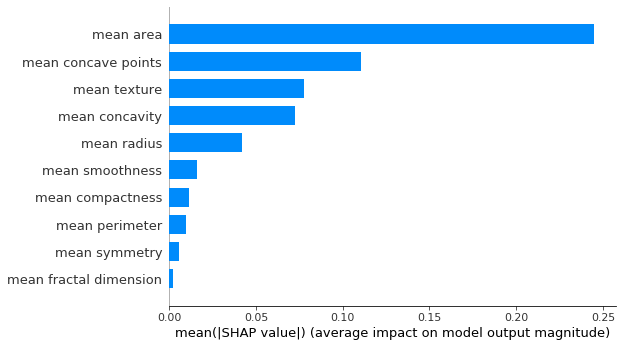

In [52]:
shap.summary_plot(shap_values[1], feature_names=feature_names, plot_type='bar')

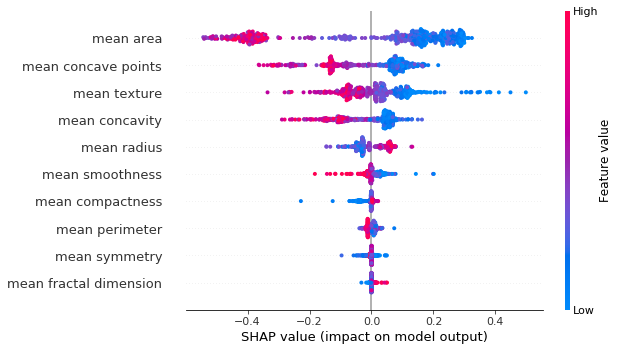

In [53]:
shap.summary_plot(shap_values[1], X_train,
                  feature_names=feature_names)

It can be conclude from the above graphs that the most essential features for this gradient boosting machines are `mean area`, `mean concavity`, `mean concave points` and `mean perimeter`. A high value in `mean area` leads to a relatively large negative SHAP value impact while a low value in `mean area` leads to a relatively large positive SHAP value impact (larger than |0.2|). It implies that a lager lump is more likely to be malignant while a smaller is likely to be benign. For `mean concavity`, `mean concave points` and `mean perimeter`, their effects on SHAP value show a similar pattern as `mean area`, but the magnitude of their impacts is smaller ( less than |0.2| ). The impact of `mean radius` is opposite to the previously mentioned ones. A high value in `mean radius` will push the SHAP value higher while a lower value pushes the SHAP value towards the negative side(less than |0.2|). The remaining features have limited power in affecting the final SHAP results.

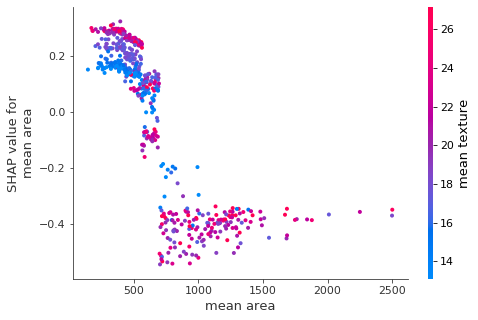

In [49]:
shap.dependence_plot(
    "mean area", shap_values[1], X_train, feature_names=feature_names)

A high value (larger than around 700) in `mean area` leads to a relatively large negative SHAP value impact(around -0.4) while a low value (smaller than around 700) in `mean area` leads to a relatively large positive SHAP value impact (around 0.2). It implies that a lager lump is more likely to be malignant while a smaller is likely to be benign. It can also be conclude that a small lump are more likely to have extreme value in mean texture.

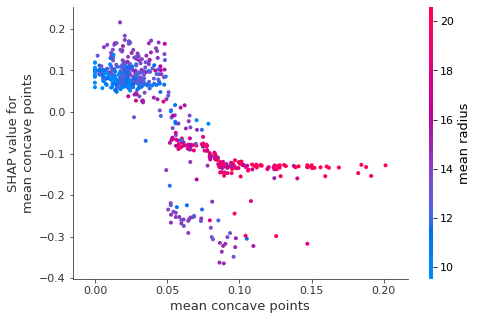

In [50]:
shap.dependence_plot(
    "mean concave points", shap_values[1], X_train, feature_names=feature_names)

From the graph above, we can conclude that a small value (lower than around 0.05) in `mean concave points` leads to a positive impact on SHAP value (around 0.1). A larger value (higher than 0.05) accompanied by a high value in `mean radius` leads to a negative SHAP value (around -0.1). A larger value (higher than 0.05) without a high value in `mean radius` leads to a negative SHAP value with a larger magnitude (around -0.3). 

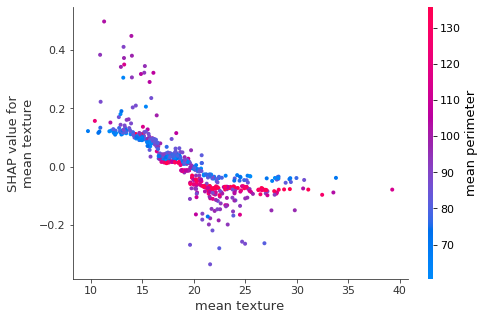

In [51]:
shap.dependence_plot(
    "mean texture", shap_values[1], X_train, feature_names=feature_names)

A negative linear relationship is observed between the value in `mean texture` and its corresponding SHAP value. When `mean texture` is hold fixed, compared to samples with higher `mean perimeter`, the samples with lower `mean perimeter` will have a slightly higher SHAP value.